In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# numpy roll()

[numpy roll()](https://numpy.org/doc/stable/reference/generated/numpy.roll.html)

## 1D array

In [2]:
x = np.arange(10)
print(x)
print(np.roll(x, 2))
print(np.roll(x, -2))

[0 1 2 3 4 5 6 7 8 9]
[8 9 0 1 2 3 4 5 6 7]
[2 3 4 5 6 7 8 9 0 1]


## 2D array

In [3]:
x2 = np.reshape(np.arange(15), (3,5))
print(x2)
print(np.roll(x2, 1))
print(np.roll(x2, -1))
print(np.roll(x2, shift=(1, 1), axis=(0, 1)))
print(np.roll(x2, shift=(2, 1), axis=(0, 1)))
print(np.roll(x2, shift=(1, 4), axis=(0, 1)))
print(np.roll(x2, shift=(0, 4), axis=(0, 1)))
print(np.roll(x2, shift=(1, 0), axis=(0, 1)))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[14  0  1  2  3]
 [ 4  5  6  7  8]
 [ 9 10 11 12 13]]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14  0]]
[[14 10 11 12 13]
 [ 4  0  1  2  3]
 [ 9  5  6  7  8]]
[[ 9  5  6  7  8]
 [14 10 11 12 13]
 [ 4  0  1  2  3]]
[[11 12 13 14 10]
 [ 1  2  3  4  0]
 [ 6  7  8  9  5]]
[[ 1  2  3  4  0]
 [ 6  7  8  9  5]
 [11 12 13 14 10]]
[[10 11 12 13 14]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]]


In [4]:
help(np.roll)

Help on function roll in module numpy:

roll(a, shift, axis=None)
    Roll array elements along a given axis.
    
    Elements that roll beyond the last position are re-introduced at
    the first.
    
    Parameters
    ----------
    a : array_like
        Input array.
    shift : int or tuple of ints
        The number of places by which elements are shifted.  If a tuple,
        then `axis` must be a tuple of the same size, and each of the
        given axes is shifted by the corresponding number.  If an int
        while `axis` is a tuple of ints, then the same value is used for
        all given axes.
    axis : int or tuple of ints, optional
        Axis or axes along which elements are shifted.  By default, the
        array is flattened before shifting, after which the original
        shape is restored.
    
    Returns
    -------
    res : ndarray
        Output array, with the same shape as `a`.
    
    See Also
    --------
    rollaxis : Roll the specified axis backwa

# Shift image

In [5]:
shape = (40, 60)
img = np.zeros(shape)
img[shape[0] // 2, shape[1] // 2] = 1

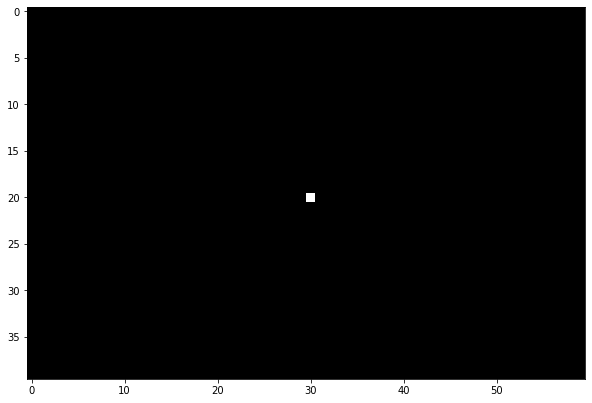

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(img, interpolation=None, cmap='gray', vmin=0, vmax=1);

In [7]:
def shift_image(img, shift):
    """Shift 2D grayscale image.
    
    Arguments
    ---------
    img (2D numpy array) : Image
    shift (tuple with 2 ints) : tuple with shift in y, then shift in x
    copy (Boolean) : if true, shift a copy of the image, otherwise copy image in place
    
    Returns
    -------
    shifted image (2D numpy array)
    """
    shift_y, shift_x = shift
    return np.roll(img, shift=(shift_y, shift_x), axis=(0, 1))

## Tests

In [8]:
# Note that the returned array is distinct from the original array

x2 = np.reshape(np.arange(15), (3,5))
print(x2)
temp = shift_image(x2, (1, 2))
print(x2)
print(temp)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[13 14 10 11 12]
 [ 3  4  0  1  2]
 [ 8  9  5  6  7]]


1.0
1.0


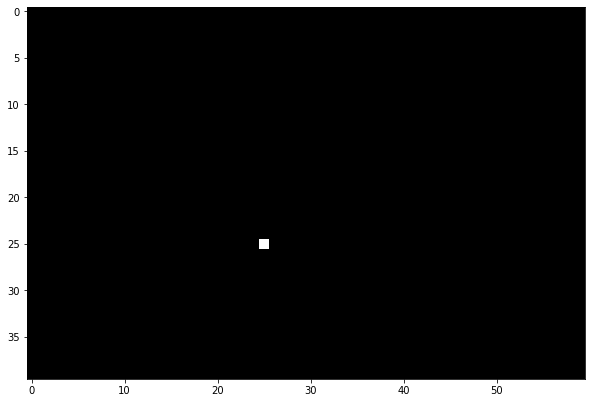

In [10]:
# Demonstrate with a visualized shifted image. Compare to image above

shift = (5, -5)
shifted_image = shift_image(img, shift)

print(img[shape[0] // 2, shape[1] // 2])
print(shifted_image[shape[0] // 2 + shift[0], shape[1] // 2 + shift[1]])

fig, ax = plt.subplots(figsize=(10,8))
ax.imshow(shifted_image, interpolation=None, cmap='gray', vmin=0, vmax=1);